In [274]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [41]:
def get_density_distribution(df,n):
    data=np.empty((n,n))
    for i in range(n):
        for j in range(n):
            data[-j,-i]=len(df[(df.x<(i+1)) & (df.x>=i)&(df.y<(j+1))&(df.y>=j)])
    return np.reshape(data,n**2)

In [240]:
def csr_ratio(points,quadrats):
    dists=get_density_distribution(points,quadrats)
    csr=dists.std()**2/dists.mean()
    return csr
def make_csr_test(n):
    rpts=np.multiply(5,np.random.rand(n,2))
    rdf=pd.DataFrame(rpts,columns=['x','y'])
    return csr_ratio(rdf,5)

0.9430699028476666 0.2682342431887573


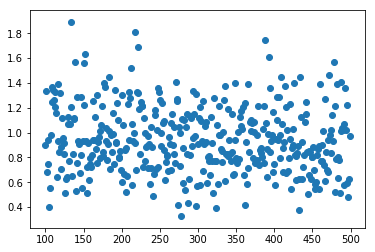

In [241]:
manycsr=np.array([make_csr_test(i) for i in range( 100,500)])
print(manycsr.mean(),manycsr.std())
plt.scatter([i for i in range( 100,500)],manycsr)

The above code is the scr variance over mean ratio, plotted for density values from 100 to 500 per unit area on a 5 by 5 square with 25 1x1 quadrats. contrasting with the plot that we see from the experimental data.

poisson cluster process. generate n parent event due to a poisson process f(). then from these generate a random u number of child processes some gaussian displacement N(o,r) from the parent.

In [263]:
def gaussian_children(p,u,r):
    l=np.random.randint(u)
    x=np.random.normal(p[0],r,(l))
    y=np.random.normal(p[1],r,(l))
    return np.concatenate([[x],[y]],axis=0).T
def poisson_cluster(size,n,u,r):
    parents=np.multiply(size,np.random.rand(n,2))
    children=[]
    for p in parents:
        children.append(gaussian_children(p,u,r))
    children=np.concatenate(children)
    return(pd.DataFrame(parents,columns=['x','y']),pd.DataFrame(children,columns=['x','y']))
    
    

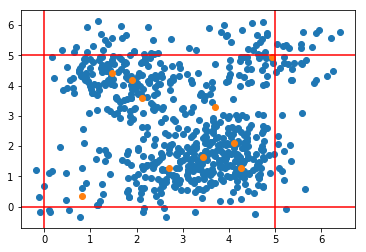

In [290]:
prents,children=poisson_cluster(5,10,100,0.66)
plt.scatter(children.iloc[:,0],children.iloc[:,1])
plt.scatter(prents.iloc[:,0],prents.iloc[:,1])
csr_ratio(children,5)

plt.axhline(0,color='r')
plt.axhline(5,color='r')
plt.axvline(0,color='r')
plt.axvline(5,color='r')



In [270]:
manypclust=np.array([csr_ratio(poisson_cluster(5,50,20,0.66)[1],5) for i in range( 100,500)])
print(manypclust.mean(),manypclust.std())

3.072309637217803 1.1313618887976087


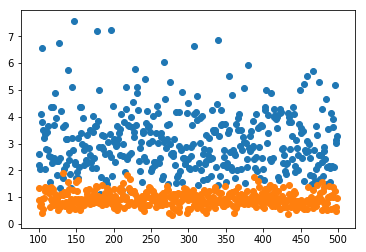

In [271]:
plt.scatter([i for i in range( 100,500)],manypclust)
plt.scatter([i for i in range( 100,500)],manycsr)

as a quick one off a poisson process with 50 parents, a mean number of 10 children `np.rand.ranint(0,20)`, and a gaussian displacement from parent to child of $\sigma=0.66$ (this value is in sore need of physical updating, in fact the whole thing is empiracle, if still physically reasonable)